# BEGINNING

In [1]:
from sympy import symbols, Matrix, MatrixSymbol, sqrt, simplify, latex, diff, fraction, \
                  collect, expand, shape, solve, eye, factor, cse, init_printing
init_printing()
m0, h, e, epsilon0, r_hat_modulus, R0, gamma_v1, gamma_v1,gamma_v2, v1, v2, c, N, pi, lambda_1, alpha, R0, delta = \
      symbols('m0 h e epsilon0 r_hat_modulus R0 gamma_v1 gamma_v1 gamma_v2 v1 v2 c N pi lambda_1 alpha R0 delta')

def simplify_M(M):
    # Check if M is a Matrix or a one-dimensional iterable (like a vector)
    if isinstance(M, Matrix):
        # Apply simplify to each element of the matrix
        return Matrix(M.rows, M.cols, lambda i, j: simplify(M[i, j]))
    else:
        # Treat M as a vector (one-dimensional iterable)
        return [simplify(element) for element in M]

One = MatrixSymbol("One", 3,3)
V1_hat = MatrixSymbol("V1_hat", 3,1)
V1 = v1* V1_hat
V2_hat = MatrixSymbol("V2_hat", 3,1)
V2 = v2* V2_hat
R0_hat = MatrixSymbol("R0_hat", 3,1)
R0_vect = R0*R0_hat
r_hat = MatrixSymbol("r_hat", 3,1)
r = delta * r_hat
# r_hat_modulus = r_hat.T*r_hat

A = One
B = V1*V1.T/v1**2
C = (gamma_v1 -1)*One
D = V2*V2.T/v2**2
E = (gamma_v2 -1)*One
M1 = A + C*B
M2 = A + D*E

r_hat = MatrixSymbol("r_hat", 3,1)
path0 = delta*r_hat
path0_hat = r_hat
path1 = MatrixSymbol("path1", 3,1) 
path1_hat = MatrixSymbol("path1_hat", 3,1)
path2 = MatrixSymbol("path2", 3,1)
path2_modulus = symbols("path2_modulus")
path2_hat = path2/path2_modulus


# path1 = V1*lambda_1/c + delta*r_hat
# path1_hat = V1/v1+c/(v1*lambda_1)*r
# path2 = -V2*R0/c + R0_vect +  V1*lambda_1/c + r
# path2_modulus = sqrt(path2.T * path2).subs(delta,0)
# path2_hat = path2/path2_modulus
k0_vect = 2*pi/(lambda_1)*path0_hat
k1_vect = 2*pi/(lambda_1)*(M1*M1*path1_hat)
k2_vect = 2*pi/(lambda_1)*(M2*M2*path2_hat)

# Calculate Fi1

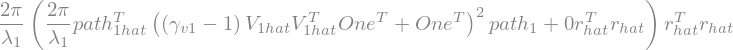

In [2]:
k01Path= k1_vect.T*path1+k0_vect.T*path0
dk1ddelta = diff(k01Path, delta)
dFi1ddelta = k01Path*dk1ddelta
dFi1ddelta = dFi1ddelta.subs(delta,0)
dFi1ddelta

# Calculater Fi2

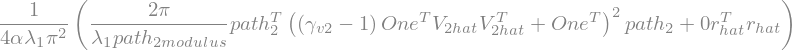

In [3]:
k2Path2 = (k2_vect.T*path2+k0_vect.T*path0)
# divide it by 2 pi to get the number of cycles
k2Path2 = k2Path2/(2*pi)
# divide it by (2 pi alpha) to express the local density decay (1 was divided into 2 pi, 
# then that density decayed with the number of cycles linearly
k2Path2 = k2Path2/(2*pi*lambda_1*alpha)
dk2ddelta = diff(k2Path2, delta)
dk2ddelta = dk2ddelta.subs(delta,0)
k2Path2 = k2Path2.subs(delta,0)
k2Path2

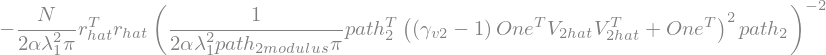

In [4]:
dFi2ddelta =  -N*dk2ddelta/k2Path2**2
dFi2ddelta

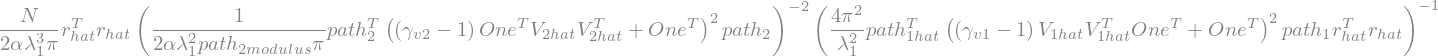

In [5]:
delta = -dFi2ddelta/dFi1ddelta/lambda_1
delta

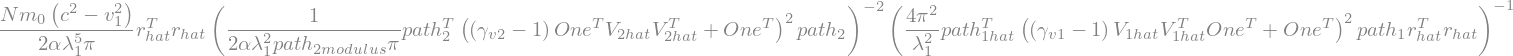

In [6]:
Force = m0*c**2*(1-v1**2/c**2)*delta/lambda_1**2
Force.simplify()

In [13]:
latex_str = latex(dFi2ddelta, mode='plain')
# Write to a file
with open('./img/dFi2ddelta.tex', 'w') as file:
    file.write(latex_str)
    
latex_str = latex(k2Path2, mode='plain')
# Write to a file
with open('./img/k2Path2.tex', 'w') as file:
    file.write(latex_str)
    
latex_str = latex(delta, mode='plain')
# Write to a file
with open('./img/delta.tex', 'w') as file:
    file.write(latex_str)
    
latex_str = latex(dFi2ddelta, mode='plain')
# Write to a file
with open('./img/dFi2ddelta.tex', 'w') as file:
    file.write(latex_str)

latex_str = latex(Force, mode='plain')
# Write to a file
with open('./img/Force.tex', 'w') as file:
    file.write(latex_str)

In [8]:
from astropy import units as uu, constants as cc
import numpy as np
m_H=cc.m_p+cc.m_e
N= (uu.kg/m_H).si
# So 1kg_4D is equivalent to 5.9753831E26 Fundamental Dilators 
# or 5.9753831E26 electron charges or 95736192 Coulombs
N*cc.e.si
R0= (14.04E9*uu.lyr).si
lambda_1 = (cc.h/m_H/cc.c).si
lambda_1

<Quantity 1.32069058e-15 m>

In [9]:
G_delta = cc.G/(  (2*np.pi**2/(2*np.pi*cc.alpha))/N**2*R0/lambda_1*uu.N/uu.kg**2*uu.m**2 )
G_delta.si

<Quantity 0.55037918>

# Natural Frequency of Gravitational Waves is given by this simple model
$$ F = mc^2 \frac{dtan(\alpha_0)}{dr}=mc^2 \frac{\frac{8\delta x}{R_0}}{\lambda_1} = m (2 \pi f)^2 x $$

$$ f = \frac{c}{2 \pi} \sqrt{ \frac{8\delta}{\lambda_1R_0}    } $$

In [10]:
# notice that for the Gravitational Fundamental Dilator, the 4D mass is 2 Hydrogen atoms
# so, N and lambda_1 are halved. Since the formula for delta is proportional to 1/(N*lambda_1)
# the value of delta is multiplied by 8

frequency = cc.c/(2*np.pi)*np.sqrt( 8 * G_delta/R0/lambda_1)
frequency.si

<Quantity 239.03989853 1 / s>

# Coincidently this frequency is almost 240 Hertz and would be considered in LIGO as electronic noise (harmonic)

One of the most famous observations of neutron star orbits via gravitational waves is from the event GW170817. This event was the first-ever detection of gravitational waves from a binary neutron star merger, observed by LIGO and its sister observatory, Virgo, on August 17, 2017. 

During the final minutes before the merger, the neutron stars were orbiting each other at an incredibly high speed. To give you a sense of how fast they were orbiting, let's use the fact that the gravitational wave frequency is twice the orbital frequency of the binary system due to the quadrupole nature of gravitational radiation.

At the point of the last observable orbit before merger, the gravitational wave frequency was about 1500 Hz. Therefore, the orbital frequency $ ( f_{\text{orb}} ) $ of the neutron stars was approximately half of that, which is 750 Hz. This means the neutron stars were completing 750 orbits around each other every second just before they merged.

Using the formula for the orbital frequency of two objects in a circular orbit:
$$  f_{\text{orb}} = \frac{1}{2\pi} \sqrt{\frac{G(M_1 + M_2)}{r^3}}  $$

where \( G \) is the gravitational constant, \( M_1 \) and \( M_2 \) are the masses of the two neutron stars, and $ r $ is the distance between their centers, we could technically work backwards to find $ r $ if we knew the masses. However, it's simpler to state that, as they approached merger, their separation was just a few tens of kilometers, and they were moving at a significant fraction of the speed of light.

To summarize, the neutron stars in the event GW170817 were orbiting each other at an orbital frequency of approximately 750 Hz, which means they were orbiting each other 750 times per second just before merging. This is an astonishingly rapid orbit, showcasing the extreme conditions under which these cosmic events occur.

Yes, LIGO (Laser Interferometer Gravitational-Wave Observatory) and other gravitational wave detectors like Virgo have to contend with a wide range of noise sources that can affect their ability to detect gravitational waves. These noises come from various sources, including seismic activity, thermal vibrations, and human-made noise. Human-made or "anthropogenic" noise can include frequencies that are harmonics of electrical supply systems (like 60 Hz in the United States and 50 Hz in many other countries) and its multiples, which would include 240 Hz.

LIGO's sensitivity to gravitational waves is highest in a band roughly between 10 Hz and a few kHz, which means it must be capable of distinguishing gravitational wave signals from noise across this range. To achieve this, LIGO uses a combination of physical isolation techniques for its mirrors and laser equipment, sophisticated vibration damping systems, and noise-cancellation techniques akin to noise-cancelling headphones, but much more advanced.

Specific issues with noise at 240 Hz could arise from electronic equipment, including motors, transformers, and other devices that operate with frequencies that are harmonics of the main electrical supply frequency. LIGO scientists and engineers work continuously to identify the sources of such noise and mitigate them, either by physically removing or isolating the source, using active noise cancellation, or by filtering out these frequencies during data analysis.

While I don't have specific instances where 240 Hz noise was highlighted as a problem for LIGO, it's reasonable to assume that any persistent, specific noise frequency within LIGO's sensitivity range would need to be addressed as part of their ongoing efforts to improve the observatory's sensitivity and reliability in detecting gravitational waves.